In [1]:
from pop4sim import fetch_wpp, Demography, ModelODE, reform_pars_agesex
from pop4sim.utils import *
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
def draw_pyramid(sol, demo, yrs=[2000, 2005, 2010]):
    fig, axes = plt.subplots(1, len(yrs))
    errors = list()
    labels = demo.DimNames['Age']
    for i, yr in enumerate(yrs):
        nx = demo(yr + 0.5)['N']
        y = sol.sol(yr + 0.5).reshape(nx.shape)

        if y.ndim == 2:
            axes[i].scatter(nx[:, 0], labels, color='b')
            axes[i].scatter(-nx[:, 1], labels, color='y')
            axes[i].barh(width=y[:, 0], y=labels, color='b', alpha=0.2)
            axes[i].barh(width=y[:, 1], left=-y[:, 1], y=labels, color='y', alpha=0.2)
        else:
            axes[i].scatter(y, labels, color='y')
            axes[i].barh(width=nx, y=labels, color='y', alpha=0.2)
            
        axes[i].set_title(f'Year: {yr}')
        
        err = ((nx / y - 1) ** 2).sum()
        errors.append(err)
        
    fig.tight_layout()
    return fig, axes, errors

In [3]:
ext = fetch_wpp(loc='VN', year0=2010, year1=2020)

Fetch population size
Fetch deaths
Fetch birth rate
Fetch sex ratio at birth


## Single Age, F/M

[0.0003975260438529499, 0.0022060984024416374, 0.003511447204593299]


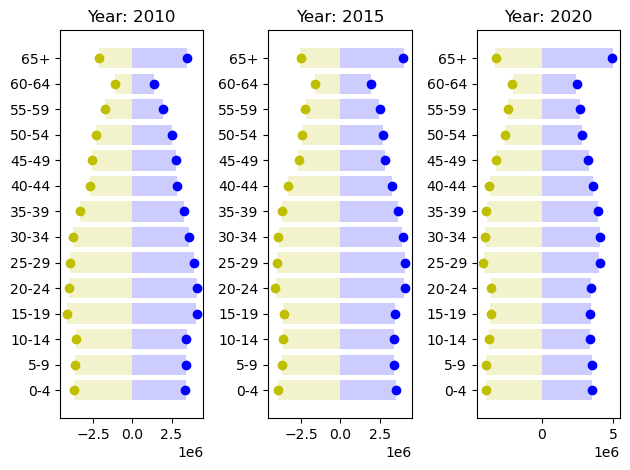

In [4]:
demo = reform_pars_agesex(ext, agp=AgeGroup5Yr, mig=False)
model = ModelODE(demo)
t_span = demo.YearSpan
y0 = model.get_y0(t_span[0])
sol = solve_ivp(model, y0=y0.reshape(-1), t_span=demo.YearSpan, dense_output=True)
fig, axes, errors = draw_pyramid(sol, demo, [2010, 2015, 2020])
print(errors)

[1.6874975068650606e-05, 0.0009856960360421878, 0.0012241218781858859]


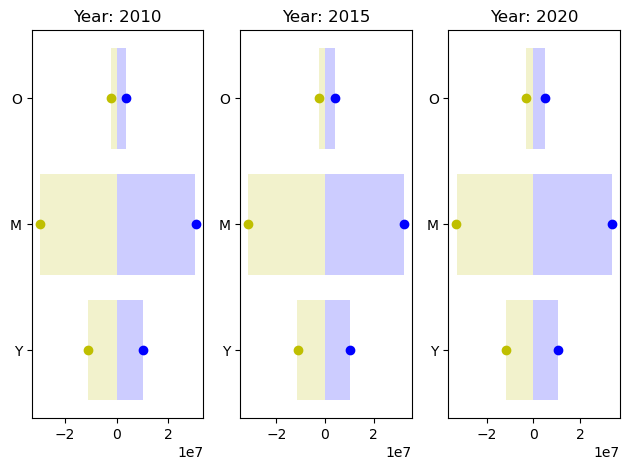

In [8]:
demo = reform_pars_agesex(ext, agp=AgeGroupYMO, mig=True, opt_mig=False)
model = ModelODE(demo)
t_span = demo.YearSpan
y0 = model.get_y0(t_span[0])
sol = solve_ivp(model, y0=y0.reshape(-1), t_span=demo.YearSpan, dense_output=True)
fig, axes, errors = draw_pyramid(sol, demo, [2010, 2015, 2020])
print(errors)

[0.16596135014554883, 1.2986087964008592, 1.6596284781848092]


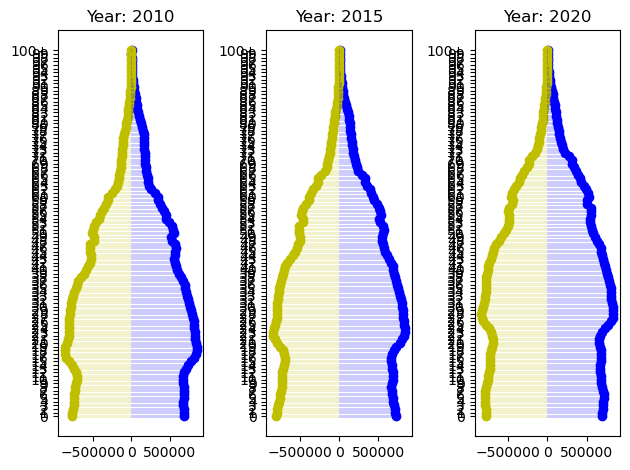

In [9]:
demo = reform_pars_agesex(ext, agp='Single', mig=True, opt_mig=False)
model = ModelODE(demo)
t_span = demo.YearSpan
y0 = model.get_y0(t_span[0])
sol = solve_ivp(model, y0=y0.reshape(-1), t_span=demo.YearSpan, dense_output=True)
fig, axes, errors = draw_pyramid(sol, demo, [2010, 2015, 2020])
print(errors)